In [1]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import joblib
import pickle

In [67]:
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: lxml, pandas, requests
Required-by: 


In [2]:
crypto_1 = 'BTC'
crypto_2 = 'BNB'
crypto_3 = 'LTC'
against_currency = 'USD'

In [61]:
#Fetching Data
yf.pdr_override()
data_1 = pdr.get_data_yahoo(f'{crypto_1}-{against_currency}', start='2012-1-1', end=dt.datetime.now())
data_2 = pdr.get_data_yahoo(f'{crypto_2}-{against_currency}', start='2017-8-1', end=dt.datetime.now())
data_3 = pdr.get_data_yahoo(f'{crypto_3}-{against_currency}', start='2020-1-1', end=dt.datetime.now())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
#Making a Lagged Dataset
data_1['Time'] = np.arange(len(data_1.index))
data_2['Time'] = np.arange(len(data_2.index))
data_3['Time'] = np.arange(len(data_3.index))

data_1['lag_1'] = data_1['Close'].shift(1)
data_1['lag_2'] = data_1['Close'].shift(2)
data_1['lag_3'] = data_1['Close'].shift(3)
data_1['lag_4'] = data_1['Close'].shift(4)
data_1['lag_5'] = data_1['Close'].shift(5)
data_1.dropna(inplace = True)

data_2['lag_1'] = data_2['Close'].shift(1)
data_2['lag_2'] = data_2['Close'].shift(2)
data_2['lag_3'] = data_2['Close'].shift(3)
data_2['lag_4'] = data_2['Close'].shift(4)
data_2['lag_5'] = data_2['Close'].shift(5)
data_2.dropna(inplace = True)

data_3['lag_1'] = data_3['Close'].shift(1)
data_3['lag_2'] = data_3['Close'].shift(2)
data_3['lag_3'] = data_3['Close'].shift(3)
data_3['lag_4'] = data_3['Close'].shift(4)
data_3['lag_5'] = data_3['Close'].shift(5)
data_3.dropna(inplace = True)

In [5]:
prep_data_1 = data_1[['Close', 'lag_1','lag_2', 'lag_3', 'lag_4', 'lag_5', 'Time']]
prep_data_2 = data_2[['Close', 'lag_1','lag_2', 'lag_3', 'lag_4', 'lag_5', 'Time']]
prep_data_3 = data_3[['Close', 'lag_1','lag_2', 'lag_3', 'lag_4', 'lag_5', 'Time']]

In [6]:
split_index1 = int(0.8*len(prep_data_1))
x1_train = pd.DataFrame(prep_data_1.iloc[:split_index1, 1:])
y1_train = pd.DataFrame(prep_data_1.iloc[:split_index1, 0])
x1_test = pd.DataFrame(prep_data_1.iloc[split_index1:, 1:])
y1_test = pd.DataFrame(prep_data_1.iloc[split_index1:, 0])

split_index2 = int(0.8*len(prep_data_2))
x2_train = pd.DataFrame(prep_data_2.iloc[:split_index2, 1:])
y2_train = pd.DataFrame(prep_data_2.iloc[:split_index2, 0])
x2_test = pd.DataFrame(prep_data_2.iloc[split_index2:, 1:])
y2_test = pd.DataFrame(prep_data_2.iloc[split_index2:, 0])

split_index3 = int(0.8*len(prep_data_3))
x3_train = pd.DataFrame(prep_data_3.iloc[:split_index3, 1:])
y3_train = pd.DataFrame(prep_data_3.iloc[:split_index3, 0])
x3_test = pd.DataFrame(prep_data_3.iloc[split_index3:, 1:])
y3_test = pd.DataFrame(prep_data_3.iloc[split_index3:, 0])

Traditional Models

In [7]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(x1_train, y1_train)

LinearRegression()

In [8]:
LR1_pred = LR1.predict(x1_test)
LR1.score(x1_test, y1_test)

0.9929714756704723

In [9]:
mean_squared_error(y1_test, LR1_pred)

817739.5563380787

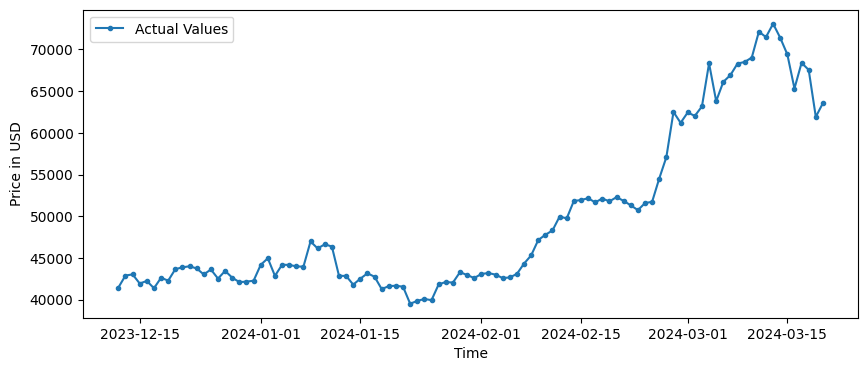

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(y1_test[-100:], label='Actual Values', marker = 'o', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

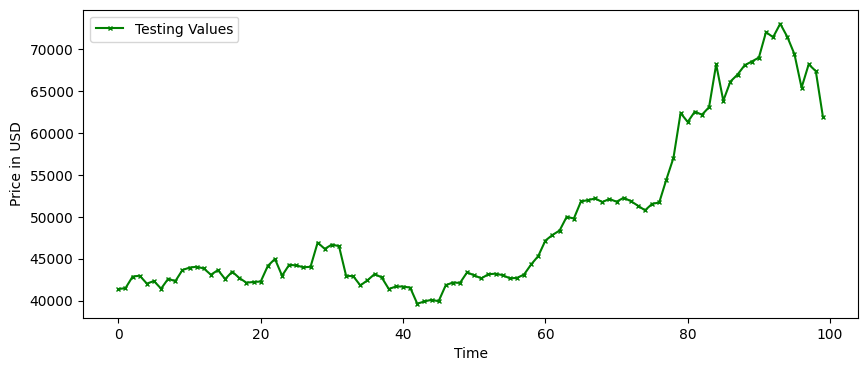

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(LR1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

In [12]:
#Function for predicting future days
def prediction(model, days, train, test):
  future_steps = days
  future_features = train.iloc[-1].values.reshape(1, -1)
  future_predictions = []
  for _ in range(future_steps):
      with warnings.catch_warnings():
          warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)
      future_pred = model.predict(future_features)
      future_predictions.append(future_pred[0])
      future_features = np.roll(future_features, shift=-1)
      future_features[0, -1] = future_pred
  last_date = test.index[-1]
  future_dates = pd.date_range(start=last_date, periods=days + 1, freq='D')[1:]
  plt.figure(figsize=(15, 4))
  plt.plot(future_dates, future_predictions,color='black', label='Future Predictions', marker='o')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.title('Time Series Forecasting')
  plt.legend()
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
/usr/local/lib/python3.10/dist-packages/sklearn/ba

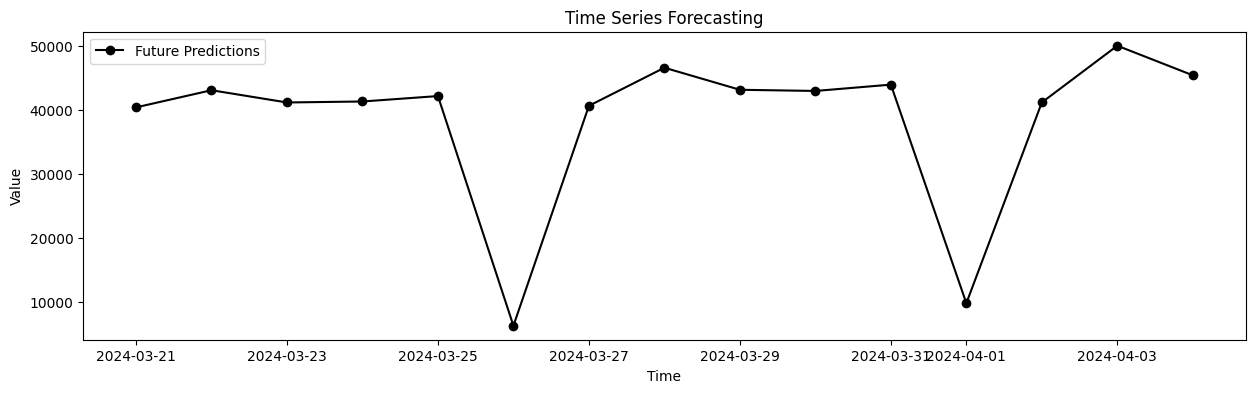

In [13]:
prediction(LR1, 15, x1_train, x1_test)

In [14]:
from sklearn.svm import SVR
SR1_params = {'kernel': 'linear'}
SR_1 = SVR(**SR1_params)
SR_1.fit(x1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [15]:
SR_1.score(x1_test, y1_test)

0.9920353244103316

In [16]:
SR1_pred = SR_1.predict(x1_test)
mean_squared_error(y1_test, SR1_pred)

926656.8596355518

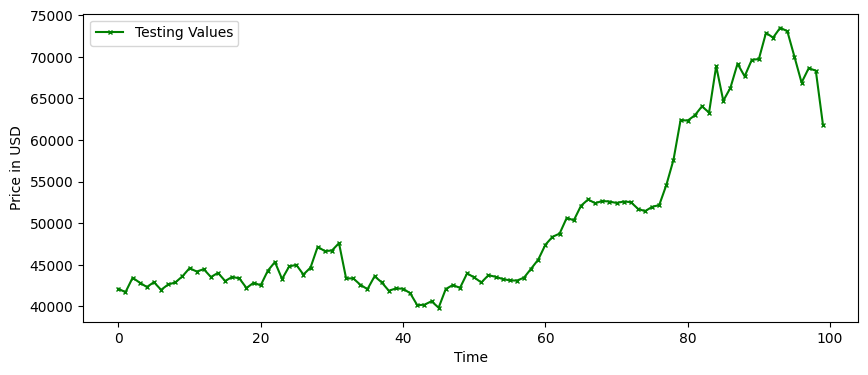

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(SR1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X 

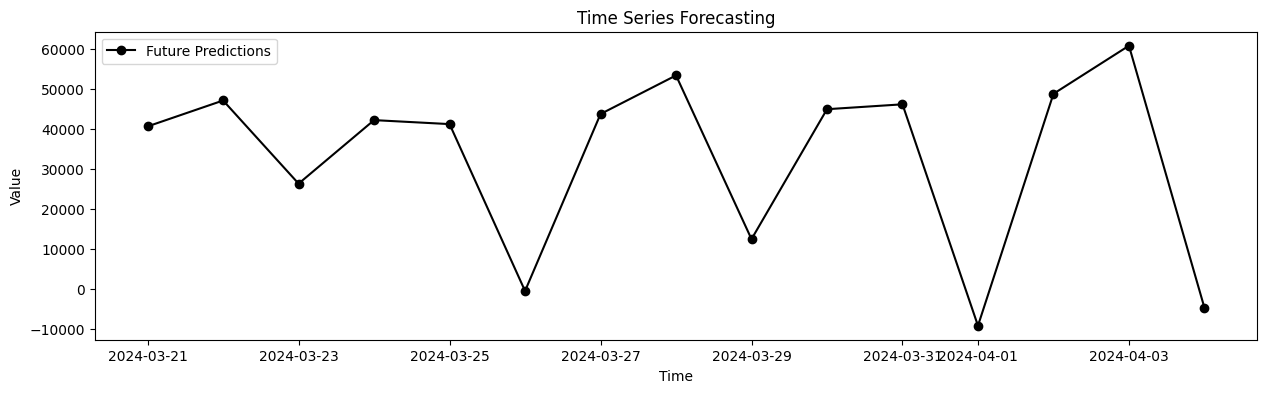

In [18]:
prediction(SR_1, 15, x1_train, x1_test)

In [19]:
from sklearn.tree import DecisionTreeRegressor
DTR_1 = DecisionTreeRegressor(random_state = 0, criterion = 'friedman_mse', max_depth = 15)
DTR_1.fit(x1_train, y1_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15, random_state=0)

In [20]:
DTR_1.score(x1_test, y1_test)

0.904956800101408

In [21]:
DTR1_pred = DTR_1.predict(x1_test)
mean_squared_error(y1_test, DTR1_pred)

11057880.783241022

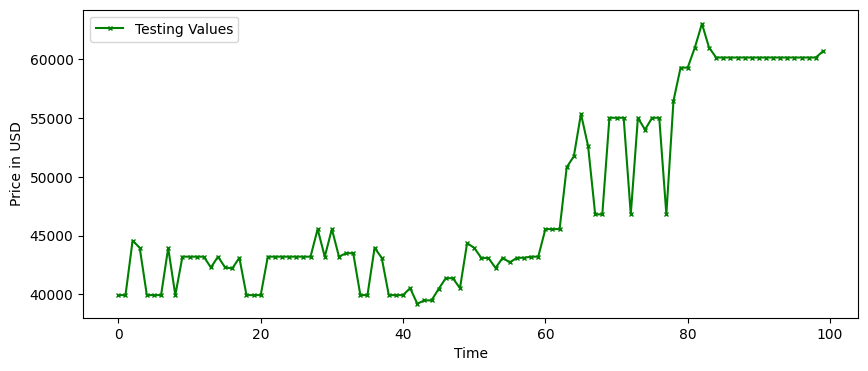

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(DTR1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
/usr/local/lib/python3.10/dist-packages/

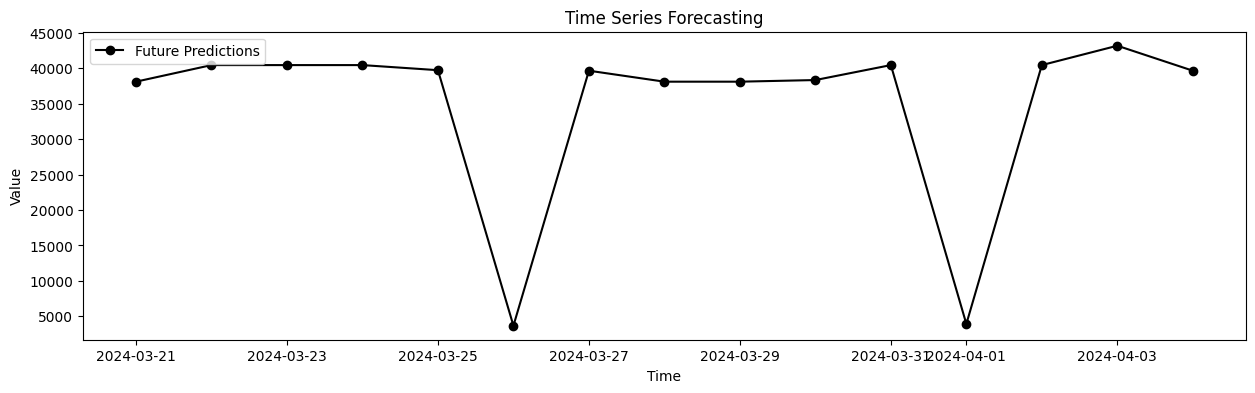

In [23]:
prediction(DTR_1, 15, x1_train, x1_test)

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn_1 = KNeighborsRegressor(n_neighbors=18)
knn_1.fit(x1_train, y1_train)

KNeighborsRegressor(n_neighbors=18)

In [25]:
knn_1.score(x1_test, y1_test)

0.9636298167952089

In [26]:
knn1_pred = knn_1.predict(x1_test)
mean_squared_error(y1_test, knn1_pred)

4231519.46033304

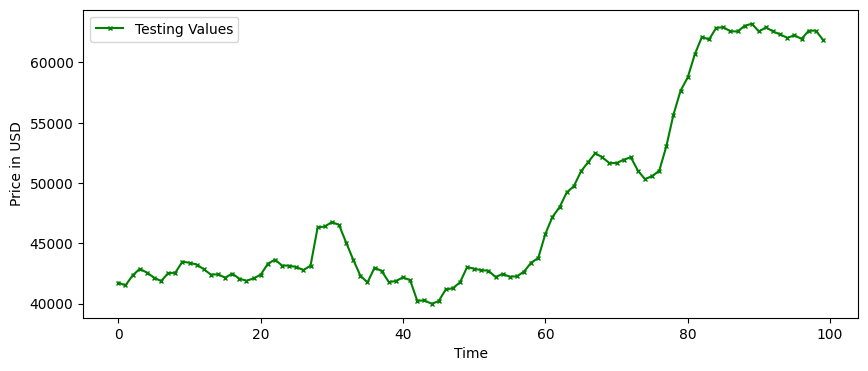

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(knn1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
/usr/local/lib/python3.10/dist-packages/skle

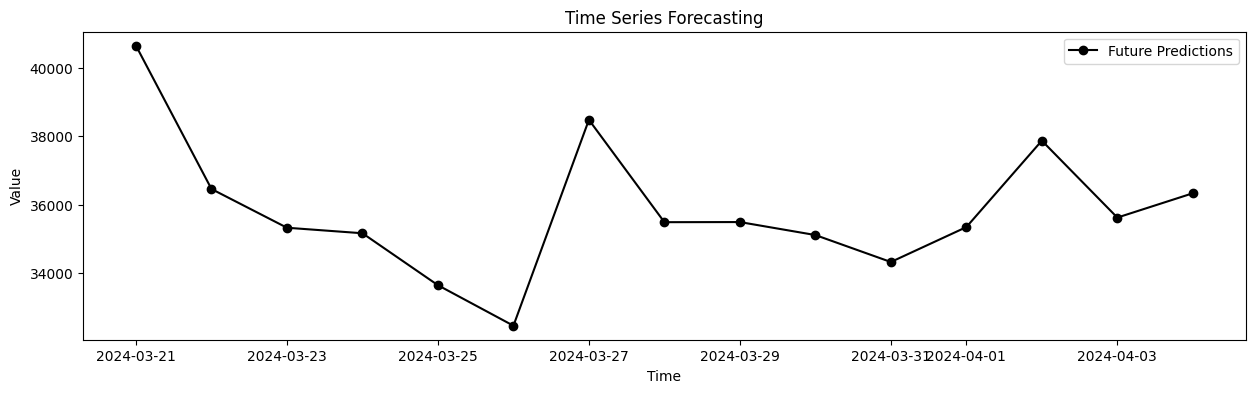

In [28]:
prediction(knn_1, 15, x1_train, x1_test)

Neural Network Models

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [30]:
#Feed Forward Neural Network
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)
FNN1 = Sequential()
FNN1.add(Dense(64, activation='relu', input_shape=(None, x1_train.shape[0], x1_train.shape[1])))
FNN1.add(Dense(32, activation='relu'))
FNN1.add(Dense(1))
FNN1.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
FNN1_his = FNN1.fit(x1_train, y1_train, epochs=50, batch_size=16, callbacks=[lr_scheduler], validation_data=(x1_test, y1_test), verbose=2)

Epoch 1/50
174/174 - 1s - loss: 8872301.0000 - val_loss: 1994170.1250 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 2/50
174/174 - 0s - loss: 1471214.7500 - val_loss: 1689136.8750 - lr: 0.0010 - 334ms/epoch - 2ms/step
Epoch 3/50
174/174 - 0s - loss: 1300604.0000 - val_loss: 1868819.5000 - lr: 0.0010 - 320ms/epoch - 2ms/step
Epoch 4/50
174/174 - 0s - loss: 1089772.6250 - val_loss: 1811927.0000 - lr: 0.0010 - 329ms/epoch - 2ms/step
Epoch 5/50
174/174 - 0s - loss: 948072.0000 - val_loss: 1126822.3750 - lr: 0.0010 - 315ms/epoch - 2ms/step
Epoch 6/50
174/174 - 0s - loss: 934345.4375 - val_loss: 1001586.1875 - lr: 0.0010 - 303ms/epoch - 2ms/step
Epoch 7/50
174/174 - 0s - loss: 816077.1250 - val_loss: 1581438.1250 - lr: 0.0010 - 304ms/epoch - 2ms/step
Epoch 8/50
174/174 - 0s - loss: 924888.8750 - val_loss: 904561.6250 - lr: 0.0010 - 330ms/epoch - 2ms/step
Epoch 9/50
174/174 - 0s - loss: 881079.1250 - val_loss: 1859509.8750 - lr: 0.0010 - 496ms/epoch - 3ms/step
Epoch 10/50
174/174 - 1s - loss: 1011

In [32]:
FNN1_pred = FNN1.predict(x1_test)

22/22 [==============================] - 0s 1ms/step


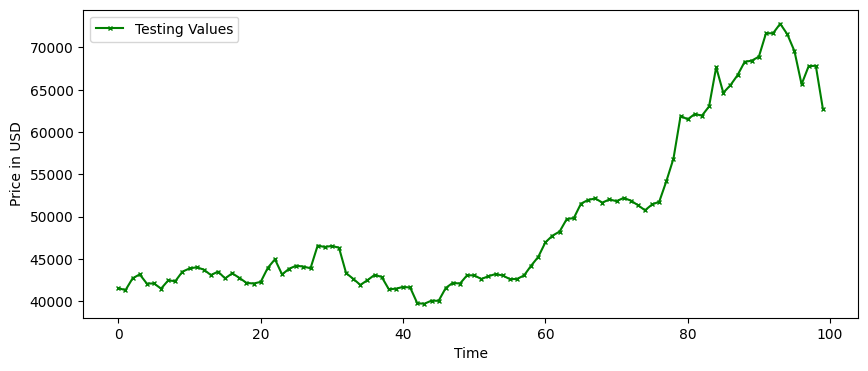

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(FNN1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 21ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 19ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 21ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 22ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 20ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


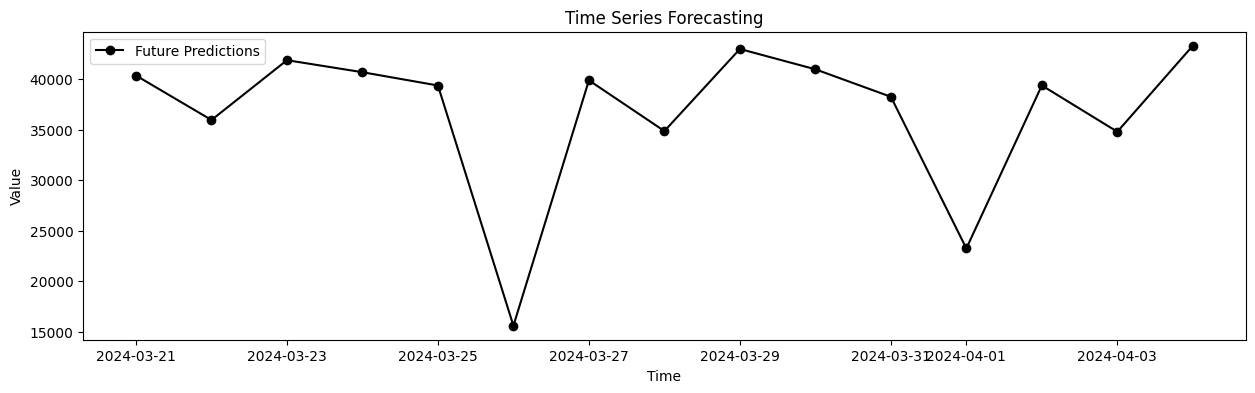

In [34]:
prediction(FNN1, 15, x1_train, x1_test)

In [35]:
#Long Short Term Memory
#Preparing data
nx1_train = x1_train.values
nx1_train = np.reshape(nx1_train, (nx1_train.shape[0], nx1_train.shape[1], 1))
ny1_train = y1_train.values.tolist()

In [36]:
LSTM1 = Sequential()
LSTM1.add(LSTM(64, activation='relu',return_sequences=True, input_shape=(nx1_train.shape[1],1)))
LSTM1.add(Dense(1))
LSTM1.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
LSTM1_his = LSTM1.fit(x1_train, y1_train, epochs=80,  batch_size=32, callbacks=[lr_scheduler], validation_data=(x1_test, y1_test), verbose=2)

Epoch 1/80
87/87 - 2s - loss: 128302480.0000 - val_loss: 190748192.0000 - lr: 0.0010 - 2s/epoch - 25ms/step
Epoch 2/80
87/87 - 0s - loss: 62266632.0000 - val_loss: 100079280.0000 - lr: 0.0010 - 473ms/epoch - 5ms/step
Epoch 3/80
87/87 - 0s - loss: 36034168.0000 - val_loss: 65100816.0000 - lr: 0.0010 - 439ms/epoch - 5ms/step
Epoch 4/80
87/87 - 0s - loss: 25803274.0000 - val_loss: 51105396.0000 - lr: 0.0010 - 446ms/epoch - 5ms/step
Epoch 5/80
87/87 - 0s - loss: 20119038.0000 - val_loss: 38814908.0000 - lr: 0.0010 - 447ms/epoch - 5ms/step
Epoch 6/80
87/87 - 1s - loss: 14487415.0000 - val_loss: 25967212.0000 - lr: 0.0010 - 603ms/epoch - 7ms/step
Epoch 7/80
87/87 - 1s - loss: 8796776.0000 - val_loss: 13162655.0000 - lr: 0.0010 - 707ms/epoch - 8ms/step
Epoch 8/80
87/87 - 1s - loss: 5121874.0000 - val_loss: 8315973.5000 - lr: 0.0010 - 626ms/epoch - 7ms/step
Epoch 9/80
87/87 - 1s - loss: 3407631.7500 - val_loss: 5239672.0000 - lr: 0.0010 - 644ms/epoch - 7ms/step
Epoch 10/80
87/87 - 0s - loss: 2

In [38]:
LSTM1_pred = LSTM1.predict(x1_test)
LSTM1_pred = LSTM1_pred.ravel()

22/22 [==============================] - 0s 3ms/step


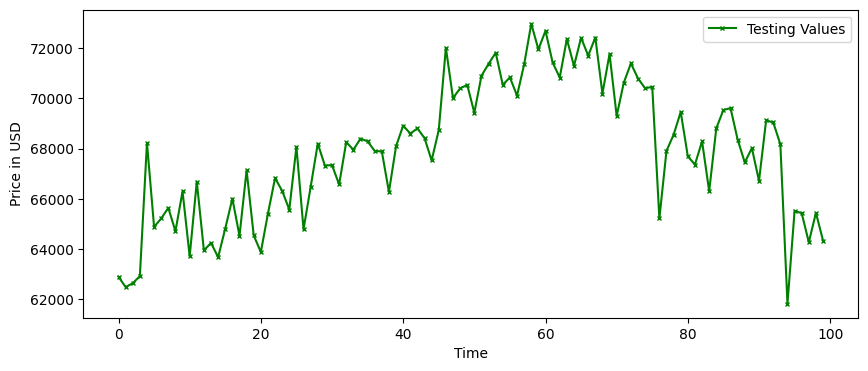

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(LSTM1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

We will be using Feed Forward Neural Network for our project

In [40]:
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)
FNN2 = Sequential()
FNN2.add(Dense(64, activation='relu', input_shape=(None, x2_train.shape[0], x2_train.shape[1])))
FNN2.add(Dense(32, activation='relu'))
FNN2.add(Dense(1))
FNN2.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
FNN2_his = FNN2.fit(x2_train, y2_train, epochs=25, batch_size=16, callbacks=[lr_scheduler], validation_data=(x2_test, y2_test), verbose=2)

Epoch 1/25
116/116 - 1s - loss: 2796.4221 - val_loss: 648.9992 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 2/25
116/116 - 0s - loss: 350.1652 - val_loss: 291.2431 - lr: 0.0010 - 333ms/epoch - 3ms/step
Epoch 3/25
116/116 - 0s - loss: 311.5467 - val_loss: 914.5922 - lr: 0.0010 - 365ms/epoch - 3ms/step
Epoch 4/25
116/116 - 0s - loss: 316.5826 - val_loss: 307.6643 - lr: 0.0010 - 472ms/epoch - 4ms/step
Epoch 5/25
116/116 - 0s - loss: 260.8529 - val_loss: 400.8788 - lr: 0.0010 - 327ms/epoch - 3ms/step
Epoch 6/25
116/116 - 0s - loss: 242.3279 - val_loss: 434.3462 - lr: 0.0010 - 281ms/epoch - 2ms/step
Epoch 7/25
116/116 - 0s - loss: 217.3073 - val_loss: 492.6049 - lr: 0.0010 - 255ms/epoch - 2ms/step
Epoch 8/25
116/116 - 0s - loss: 186.2126 - val_loss: 283.7147 - lr: 1.0000e-04 - 278ms/epoch - 2ms/step
Epoch 9/25
116/116 - 0s - loss: 183.4133 - val_loss: 333.6679 - lr: 1.0000e-04 - 259ms/epoch - 2ms/step
Epoch 10/25
116/116 - 0s - loss: 181.9318 - val_loss: 195.5224 - lr: 1.0000e-04 - 259ms/epoch

In [42]:
FNN2_pred = FNN2.predict(x2_test)

15/15 [==============================] - 0s 2ms/step


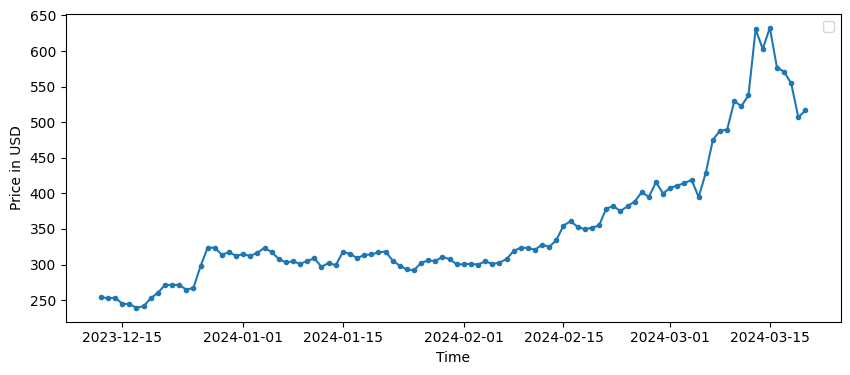

In [43]:
plt.figure(figsize=(10, 4))
plt.plot(data_2['Close'][-100:], marker = 'o', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

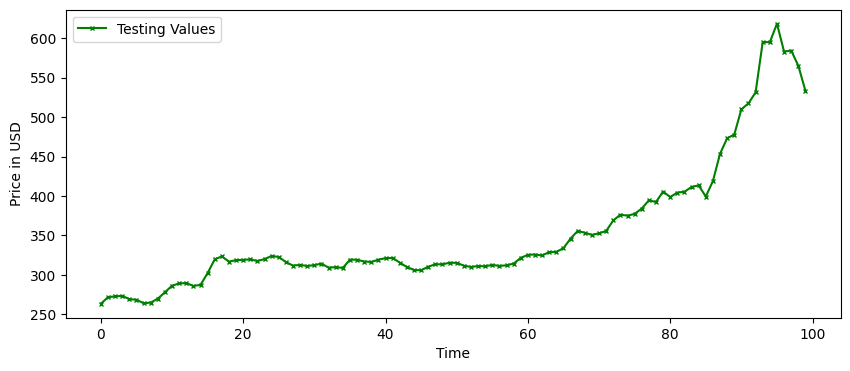

In [44]:
plt.figure(figsize=(10, 4))
plt.plot(FNN2_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 22ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 21ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 22ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 22ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


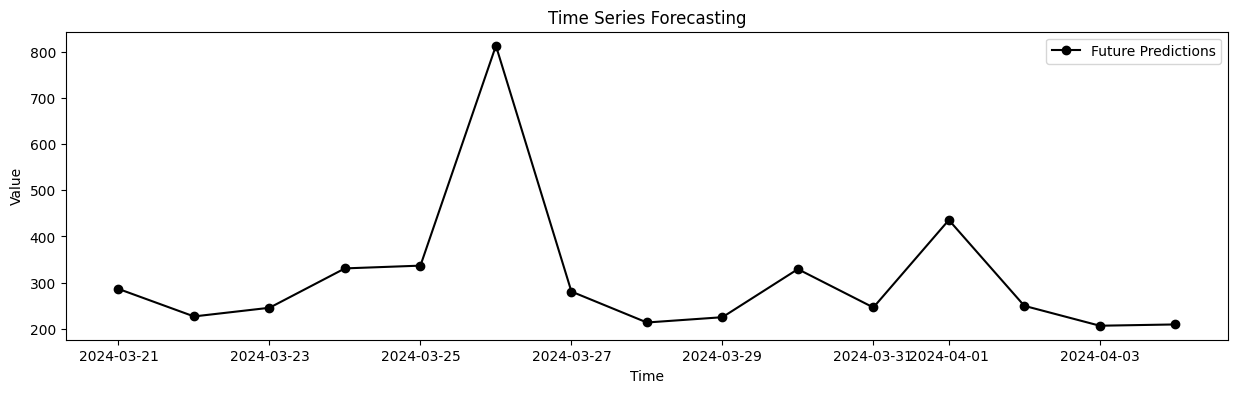

In [45]:
prediction(FNN2, 15, x2_train, x2_test)

In [46]:
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)
FNN3 = Sequential()
FNN3.add(Dense(64, activation='relu', input_shape=(None, x3_train.shape[0], x3_train.shape[1])))
FNN3.add(Dense(32, activation='relu'))
FNN3.add(Dense(1))
FNN3.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
FNN3_his = FNN3.fit(x3_train, y3_train, epochs=50, batch_size=16, callbacks=[lr_scheduler], validation_data=(x3_test, y3_test), verbose=2)

Epoch 1/50
77/77 - 1s - loss: 2579.5999 - val_loss: 115.3492 - lr: 0.0010 - 952ms/epoch - 12ms/step
Epoch 2/50
77/77 - 0s - loss: 153.0343 - val_loss: 95.0513 - lr: 0.0010 - 225ms/epoch - 3ms/step
Epoch 3/50
77/77 - 0s - loss: 142.8209 - val_loss: 55.8564 - lr: 0.0010 - 196ms/epoch - 3ms/step
Epoch 4/50
77/77 - 0s - loss: 135.4898 - val_loss: 76.8828 - lr: 0.0010 - 189ms/epoch - 2ms/step
Epoch 5/50
77/77 - 0s - loss: 131.6637 - val_loss: 43.6748 - lr: 0.0010 - 198ms/epoch - 3ms/step
Epoch 6/50
77/77 - 0s - loss: 128.8629 - val_loss: 56.3543 - lr: 0.0010 - 175ms/epoch - 2ms/step
Epoch 7/50
77/77 - 0s - loss: 116.3717 - val_loss: 30.2141 - lr: 0.0010 - 171ms/epoch - 2ms/step
Epoch 8/50
77/77 - 0s - loss: 110.9301 - val_loss: 43.1128 - lr: 0.0010 - 172ms/epoch - 2ms/step
Epoch 9/50
77/77 - 0s - loss: 103.9014 - val_loss: 24.3452 - lr: 0.0010 - 275ms/epoch - 4ms/step
Epoch 10/50
77/77 - 0s - loss: 97.2586 - val_loss: 28.3534 - lr: 0.0010 - 276ms/epoch - 4ms/step
Epoch 11/50
77/77 - 0s - lo

In [48]:
FNN3_pred = FNN3.predict(x3_test)

10/10 [==============================] - 0s 2ms/step


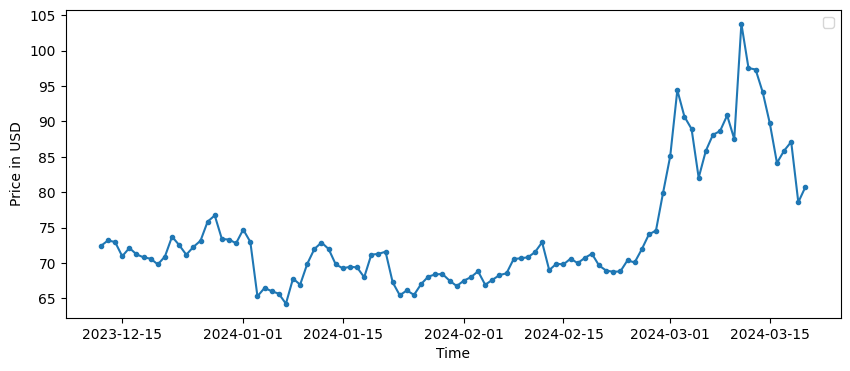

In [49]:
plt.figure(figsize=(10, 4))
plt.plot(data_3['Close'][-100:], marker = 'o', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

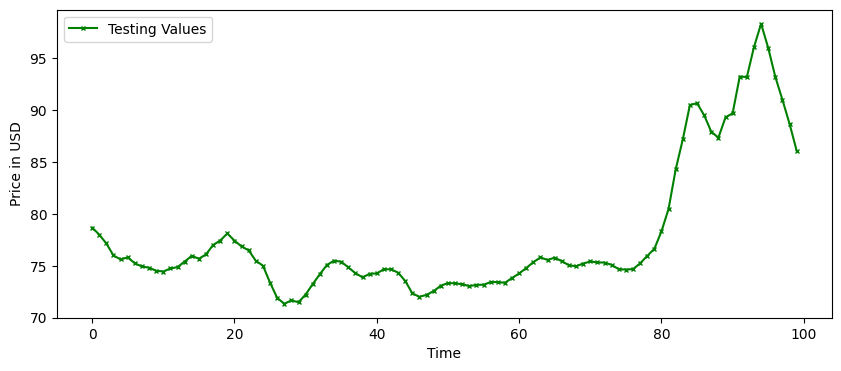

In [50]:
plt.figure(figsize=(10, 4))
plt.plot(FNN3_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

1/1 [==============================] - 0s 19ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 21ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 19ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 19ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 20ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


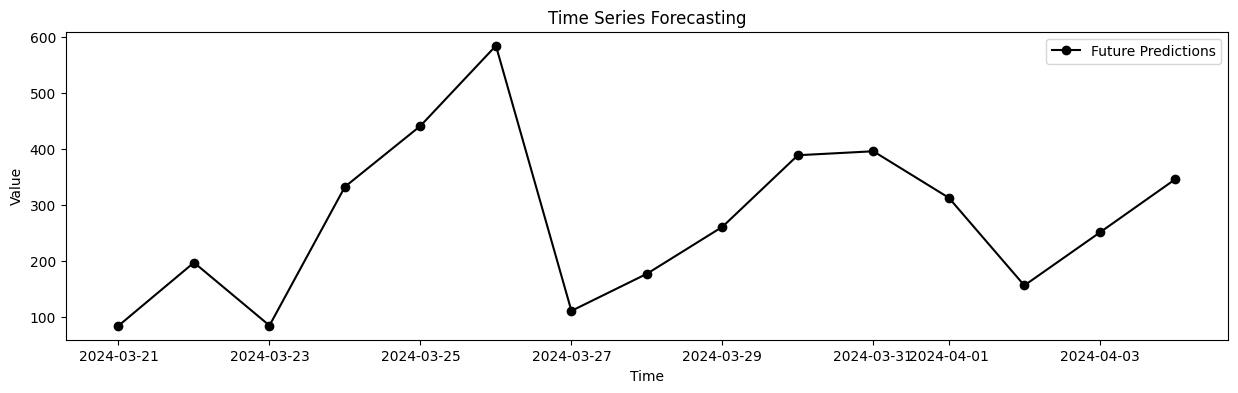

In [51]:
prediction(FNN3, 15, x3_train, x3_test)

1/1 [==============================] - 0s 34ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 38ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 34ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 46ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 35ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 32ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 44ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 33ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


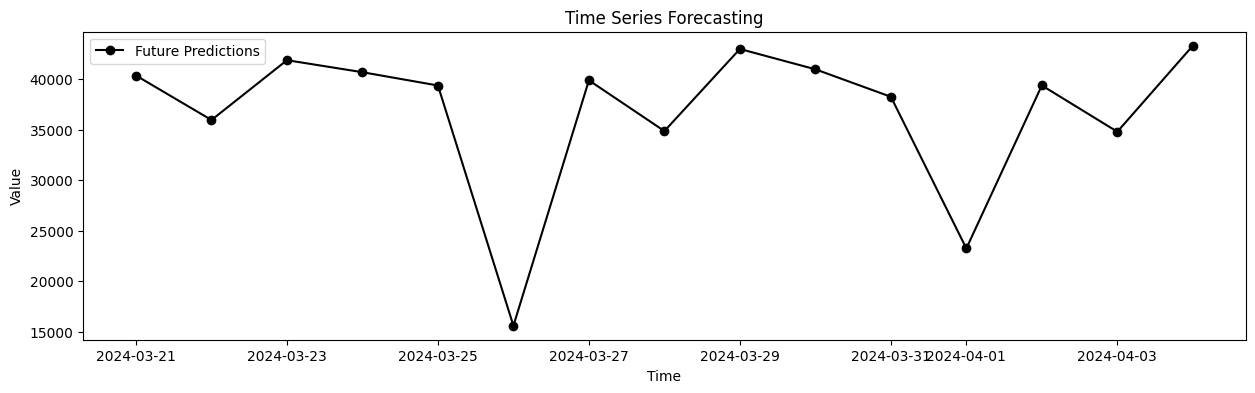

1/1 [==============================] - 0s 19ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 21ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 22ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 21ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 20ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


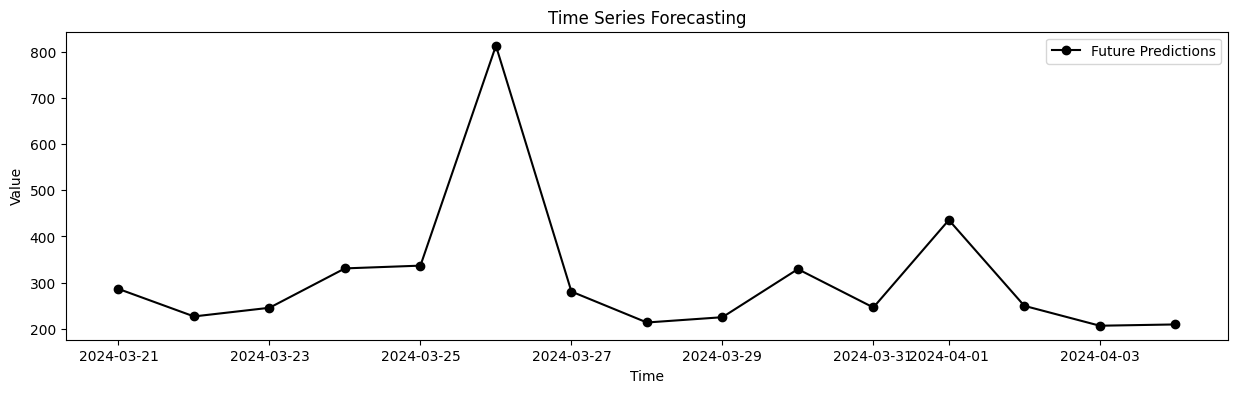

1/1 [==============================] - 0s 24ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 21ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 22ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 20ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


1/1 [==============================] - 0s 21ms/step


<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred
<ipython-input-12-cbddbd5c144c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred


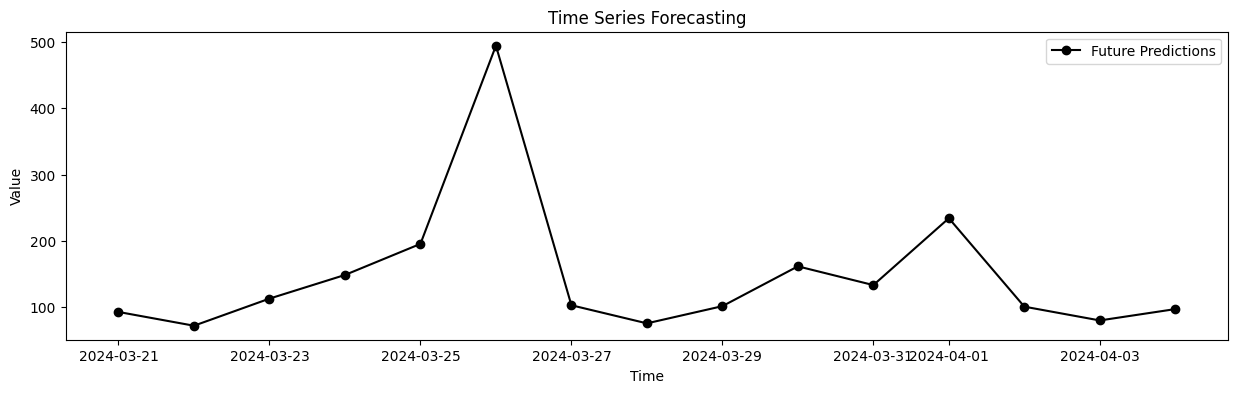

In [60]:
import tensorflow as tf
#Save the models
# FNN1.save('btc_model.h5')
# FNN2.save('bnb_model.h5')
# FNN3.save('bnb_model.h5')
#Reload the models
FNN1_loaded = tf.keras.models.load_model('btc_model.h5')
FNN2_loaded = tf.keras.models.load_model('bnb_model.h5')
FNN3_loaded = tf.keras.models.load_model('bnb_model.h5')
#Make predictions
prediction(FNN1_loaded, 15, x1_train, x1_test)
prediction(FNN2_loaded, 15, x2_train, x2_test)
prediction(FNN3_loaded, 15, x3_train, x3_test)
